In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pandas as pd 
import contextily as ctx
import seaborn as sns
from shapely.geometry import Point
%matplotlib inline

# South Africa Geography 

In [3]:
RSA = gpd.read_file("RSA.shp")

In [4]:
RSA.head()

,PROVINCE,geometry
0,EASTERN CAPE,POLYGON ((29.79121191307206 -30.05637869908956...
1,FREE STATE,POLYGON ((27.59176225679199 -26.73807490053058...
2,EASTERN CAPE,POLYGON ((23.14972047308596 -32.76715974389372...
3,NORTH-WEST,POLYGON ((27.33768163595192 -25.08803204771911...
4,KWAZULU-NATAL,POLYGON ((31.27534667239736 -27.24219050060993...


In [13]:
RSA.columns

Index(['PROVINCE', 'geometry'], dtype='object')

In [14]:
RSA.PROVINCE.unique()

array(['EASTERN CAPE', 'FREE STATE', 'NORTH-WEST', 'KWAZULU-NATAL',
       'WESTERN CAPE', 'NORTHERN CAPE', 'MPUMALANGA', 'GAUTENG',
       'NORTHERN PROVINCE'], dtype=object)

In [15]:
RSA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
PROVINCE    10 non-null object
geometry    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


In [17]:
RSA['PROVINCE'].value_counts()

EASTERN CAPE         2
NORTHERN CAPE        1
NORTH-WEST           1
KWAZULU-NATAL        1
FREE STATE           1
WESTERN CAPE         1
NORTHERN PROVINCE    1
MPUMALANGA           1
GAUTENG              1
Name: PROVINCE, dtype: int64

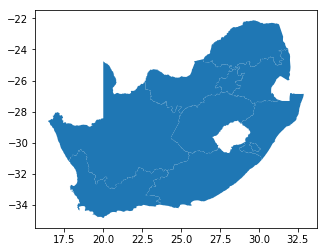

In [19]:
RSA.plot()

In [23]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

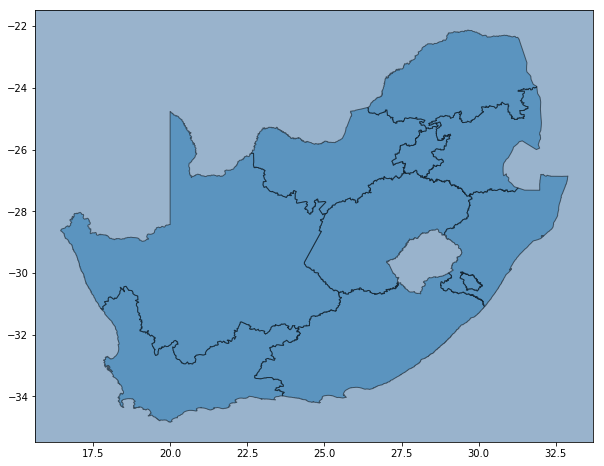

In [25]:
ax = RSA.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

In [55]:
# Let's get some simple data to plot
RSA["Number"] = [3, 2, 4, 1, 2, 3, 1, 2, 1,1]

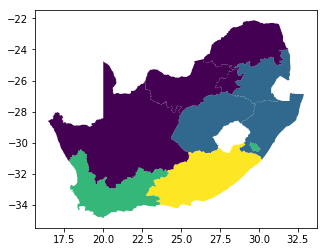

In [56]:
# Now we can plot our provinces based on this data
RSA.plot(column = "Number")

# Informal Settlements in Cape Town

In [5]:
Informal_Settlement = gpd.read_file("Informal Settlements CTn Final with ward dbf_region.shp")

In [7]:
Informal_Settlement.head()

,Town_Geo,Ward_Geo,Inf_Sttlmn,District,InformalSe,Dwelling_T,Comment,CentroidX,CentroidY,Kms_to_CBD,...,Tlt_Afrisa,Tlt_Anaero,Tlt_Chemic,Tlt_100L_C,Tlt_Enviro,Tlt_Full_F,Tlt_Pitlin,Tlt_Pour_F,Tlt_Total,geometry
0,Brackenfell,6,NORFOU001,Northern Panorama 6A,4 in 1,Informal,None,18.732603,-33.863384,45.8,...,0,0,0,0,0,32,0,0,32,POLYGON Z ((2085457.261074218 -4010459.9261817...
1,Mitchell's Plain,43,HILSEV001,Hillstar,7de Laan Strandfontein,Informal,None,18.560665,-34.079271,26.6,...,0,9,12,0,0,0,0,0,21,POLYGON Z ((2066209.711460325 -4039358.3413141...
2,Mitchell's Plain,80,HILALP001,Hillstar,Alpha Farm,Informal,None,18.547179,-34.037221,22.0,...,0,0,8,0,0,0,0,0,8,POLYGON Z ((2064710.424936083 -4033743.7112513...
3,Parow,22,TYGAPP001,Tygerberg,Appelboord,Informal,None,18.609616,-33.926016,22.1,...,0,0,0,0,0,10,0,0,10,POLYGON Z ((2071575.435594393 -4018834.9033563...
4,Atlantis,29,NORATL001,Northern Panorama 6B,Atlantis,Informal,None,18.477955,-33.564752,47.7,...,0,0,0,0,2,0,0,0,2,POLYGON Z ((2056883.333352202 -3970387.4141842...


In [26]:
Informal_Settlement.columns

Index(['Town_Geo', 'Ward_Geo', 'Inf_Sttlmn', 'District', 'InformalSe',
       'Dwelling_T', 'Comment', 'CentroidX', 'CentroidY', 'Kms_to_CBD',
       'Traveltime', 'Total_Area', 'Area_SALRe', 'Perc_Cns11', 'Popn', 'HHs',
       'Predom_Age', 'Predom_Rac', 'DwellType_', 'Tlt_25L_bl', 'Tlt_Afrisa',
       'Tlt_Anaero', 'Tlt_Chemic', 'Tlt_100L_C', 'Tlt_Enviro', 'Tlt_Full_F',
       'Tlt_Pitlin', 'Tlt_Pour_F', 'Tlt_Total', 'geometry'],
      dtype='object')

In [27]:
Informal_Settlement.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 30 columns):
Town_Geo      325 non-null object
Ward_Geo      326 non-null object
Inf_Sttlmn    326 non-null object
District      326 non-null object
InformalSe    326 non-null object
Dwelling_T    326 non-null object
Comment       45 non-null object
CentroidX     326 non-null float64
CentroidY     326 non-null float64
Kms_to_CBD    326 non-null float64
Traveltime    326 non-null float64
Total_Area    326 non-null float64
Area_SALRe    326 non-null float64
Perc_Cns11    326 non-null float64
Popn          326 non-null int64
HHs           326 non-null int64
Predom_Age    216 non-null object
Predom_Rac    216 non-null object
DwellType_    216 non-null object
Tlt_25L_bl    326 non-null int64
Tlt_Afrisa    326 non-null int64
Tlt_Anaero    326 non-null int64
Tlt_Chemic    326 non-null int64
Tlt_100L_C    326 non-null int64
Tlt_Enviro    326 non-null int64
Tlt_Full_F    326 non-null int64
Tlt_Pi

In [28]:
Informal_Settlement['Dwelling_T'].value_counts()

Informal             311
Formal / Informal     10
Containers             2
RDP / Informal         1
RDP                    1
Informal / Formal      1
Name: Dwelling_T, dtype: int64

In [29]:
Informal_Settlement['Town_Geo'].value_counts()

Mitchell's Plain    74
Khayelitsha         52
Cape Town           34
Crossroads          26
Nyanga              18
Mfuleni             17
Guguletu            13
Milnerton           10
Brackenfell          8
Du Noon              7
Langa                7
Blue Downs           7
Kraaifontein         6
Lwandle              5
Joe Slovo Park       5
Strand               5
Hout Bay             5
Somerset West        4
Masiphumelele        4
Sir Lowry's Pass     4
Atlantis             3
Elsies River         2
Nomzamo              2
Parow                2
Kuils River          1
Klipheuwel           1
Witsand              1
Pella                1
Philadelphia         1
Name: Town_Geo, dtype: int64

In [31]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [36]:
loc = ctx.Place('Western Cape', zoom_adjust=1)

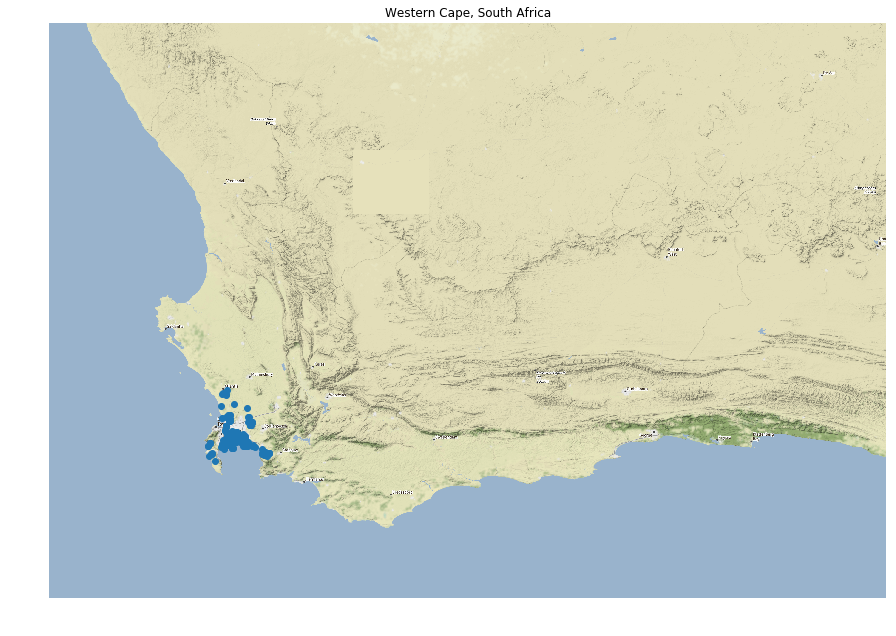

In [37]:
(ctx.plot_map(loc).
     scatter(Informal_Settlement['CentroidX'],
             Informal_Settlement['CentroidY'])
)

In [46]:
Informal_Settlement.columns

Index(['Town_Geo', 'Ward_Geo', 'Inf_Sttlmn', 'District', 'InformalSe',
       'Dwelling_T', 'Comment', 'CentroidX', 'CentroidY', 'Kms_to_CBD',
       'Traveltime', 'Total_Area', 'Area_SALRe', 'Perc_Cns11', 'Popn', 'HHs',
       'Predom_Age', 'Predom_Rac', 'DwellType_', 'Tlt_25L_bl', 'Tlt_Afrisa',
       'Tlt_Anaero', 'Tlt_Chemic', 'Tlt_100L_C', 'Tlt_Enviro', 'Tlt_Full_F',
       'Tlt_Pitlin', 'Tlt_Pour_F', 'Tlt_Total', 'geometry'],
      dtype='object')

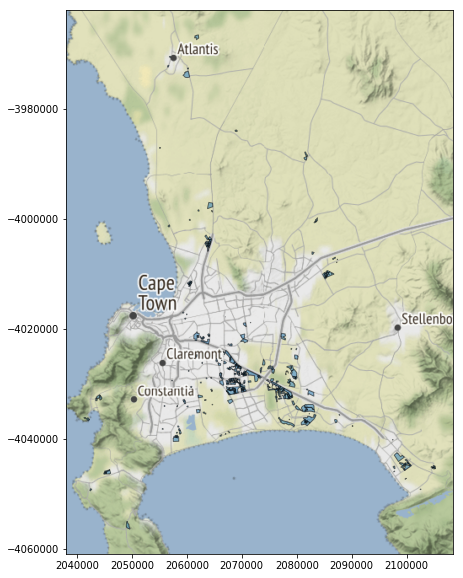

In [49]:
ax = Informal_Settlement.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

In [50]:
Informal_Settlement.columns

Index(['Town_Geo', 'Ward_Geo', 'Inf_Sttlmn', 'District', 'InformalSe',
       'Dwelling_T', 'Comment', 'CentroidX', 'CentroidY', 'Kms_to_CBD',
       'Traveltime', 'Total_Area', 'Area_SALRe', 'Perc_Cns11', 'Popn', 'HHs',
       'Predom_Age', 'Predom_Rac', 'DwellType_', 'Tlt_25L_bl', 'Tlt_Afrisa',
       'Tlt_Anaero', 'Tlt_Chemic', 'Tlt_100L_C', 'Tlt_Enviro', 'Tlt_Full_F',
       'Tlt_Pitlin', 'Tlt_Pour_F', 'Tlt_Total', 'geometry'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


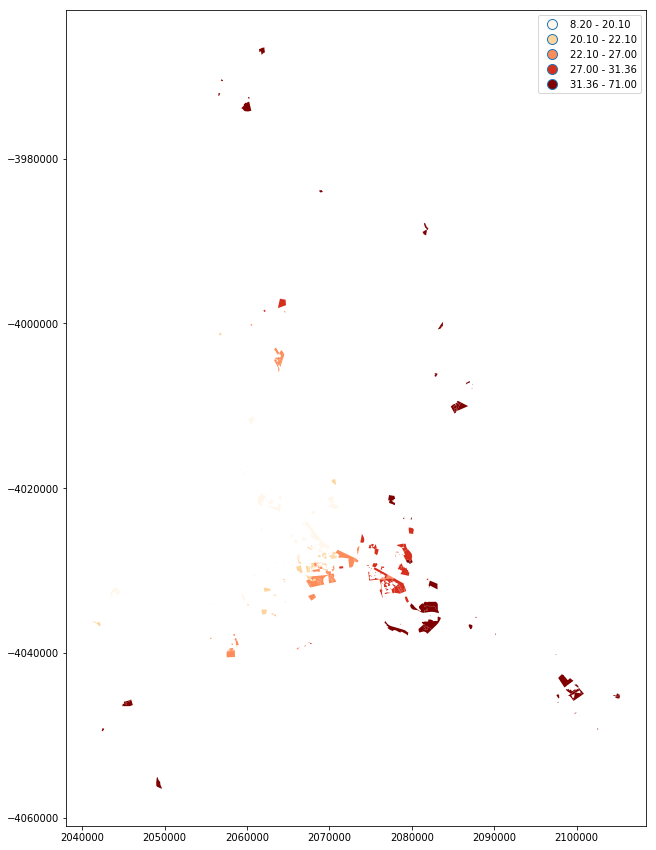

In [51]:
Distance = Informal_Settlement[Informal_Settlement.Town_Geo.notnull()].plot(column="Kms_to_CBD",cmap='OrRd',scheme='quantiles',legend=True,figsize=(15,15))

# SAPS Stations 

In [8]:
SAPS_stations = gpd.read_file("sap_stations.shp")

In [9]:
SAPS_stations.head()

,ID_,NAME2_,TYPE,NAME,VERIFIED,DATE_OF_V,ADDRESS,geometry
0,polstatgP54,54,Satellite,Ntuzuma -C,Image,2012-05-08,47 MATAFUNA SECONDARY ROAD,POINT (-4759.147349729006 -3290684.977951685)
1,polstatgP6,6,Reporting,Bellair,Image,2012-05-08,"1345 SARNIA ROAD, HILLARY ROAD, DURBAN",POINT (-5653.329213781665 -3307872.70541453)
2,polstatgP23,23,Reporting,Chatsworth,Image,2012-05-08,"4 JUSTICE STREET, CHATSWORTH, DURBAN",POINT (-11093.34713715584 -3310440.354826297)
3,polstatgP36,36,Reporting,Amanzimtoti,Image,2012-05-08,"21 ADAMS ROAD, AMANZIMTOTI",POINT (-11557.53795140781 -3325856.763841904)
4,polstatgP37,37,Satellite,Illovu North,Image,2012-05-08,"9 STREET 50001, ILLOVU",POINT (-15518.74831218771 -3329130.547285375)


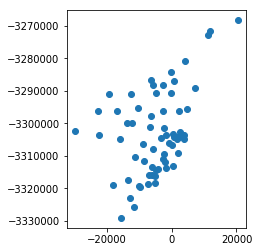

In [60]:
SAPS_stations.plot()


# SAPS Boundaries

In [10]:
SAPS_boundaries = gpd.read_file("saps_bnd.shp")

In [11]:
SAPS_boundaries.head()

,ENTITY,LAYER,LEVEL,ELEVATION,COLOR,NAME,SNAPPED,geometry
0,Complex Shape,2,2,0.0,4,TONGAAT,?,POLYGON ((17509.02173720388 -3272498.221212741...
1,Complex Shape,2,2,0.0,4,VERULAM,?,POLYGON ((3324.642625747451 -3270184.488414566...
2,Complex Shape,2,2,0.0,4,INANDA,?,POLYGON ((-22239.14865490014 -3272396.16866452...
3,Complex Shape,2,2,0.0,4,DURBAN NORTH,?,POLYGON ((10221.28059683396 -3281240.248105234...
4,Complex Shape,2,2,0.0,4,PHOENIX,?,POLYGON ((5960.572446191817 -3284302.620174809...


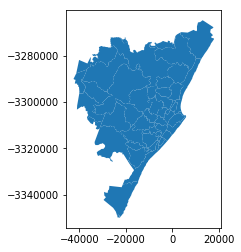

In [61]:
SAPS_boundaries.plot()

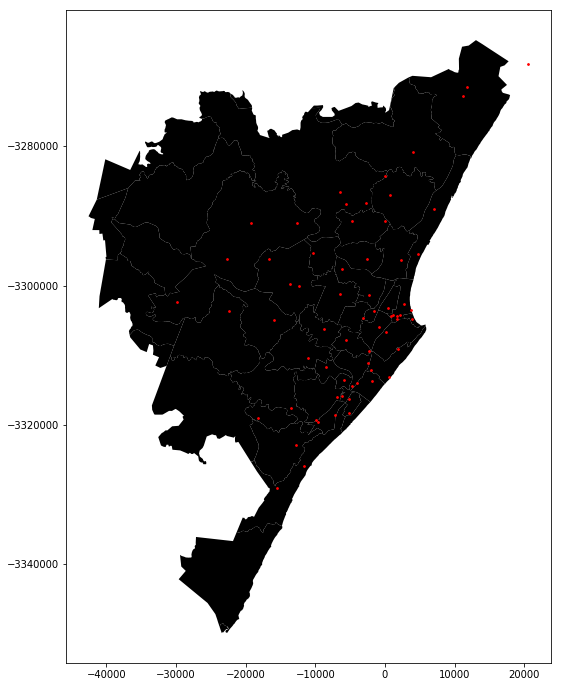

In [64]:
#Plot SAPS stations on 
f, ax = plt.subplots(1, figsize=(12, 12))
base = SAPS_boundaries.plot(color='black', ax=ax)
SAPS_stations.plot(ax=base, marker='o', color='red', markersize=3)
plt.show()